##### Imports

In [87]:
import os
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
from biosppy.signals import ecg
from scipy.fft import fft, fftfreq
from collections import defaultdict

##### Paths


In [88]:
df_train_labels_path = "/home/bunyamin/Desktop/BE_PC/Work/2.Project/5.Heartbeat/Dev/Heartbeat/.data/raw/train/REFERENCE.csv"
df_val_labels_path = "/home/bunyamin/Desktop/BE_PC/Work/2.Project/5.Heartbeat/Dev/Heartbeat/.data/raw/validation/REFERENCE.csv"
train_dir = "/home/bunyamin/Desktop/BE_PC/Work/2.Project/5.Heartbeat/Dev/Heartbeat/.data/raw/train"
val_dir   = "/home/bunyamin/Desktop/BE_PC/Work/2.Project/5.Heartbeat/Dev/Heartbeat/.data/raw/validation"
sample_mat_file_path = "/home/bunyamin/Desktop/BE_PC/Work/2.Project/5.Heartbeat/Dev/Heartbeat/.data/raw/train/A00/A00001.mat"

##### Data

In [89]:
df_labels = pd.read_csv(df_train_labels_path,
                        sep=",",
                        header=None,
                        names=["record", "label"])

print(df_labels.shape)
print(df_labels['label'].value_counts())
print(df_labels['label'].value_counts(normalize=True)*100)


(8528, 2)
label
N    5076
O    2415
A     758
~     279
Name: count, dtype: int64
label
N    59.521576
O    28.318480
A     8.888368
~     3.271576
Name: proportion, dtype: float64


In [90]:
train_records = set()
for root, dirs, files in os.walk(train_dir):
    for f in files:
        if f.endswith(".mat"):
            base_name = os.path.splitext(f)[0]
            train_records.add(base_name)

val_records = set()
for root, dirs, files in os.walk(val_dir):
    for f in files:
        if f.endswith(".mat"):
            base_name = os.path.splitext(f)[0]
            val_records.add(base_name)

print(f"number of .mat files in `train` folder: {len(train_records)}")
print(f"number of .mat files in `validation` folder: {len(val_records)}")

number of .mat files in `train` folder: 8528
number of .mat files in `validation` folder: 300


In [91]:
common_records = train_records.intersection(val_records)
print(f"Number of common records: {len(common_records)}")

if common_records:
    print("Common records:")
    for rec in sorted(common_records):
        print(rec)
else:
    print("There is no common record between the two folders.")

Number of common records: 300
Common records:
A00001
A00002
A00003
A00004
A00005
A00006
A00007
A00008
A00009
A00010
A00011
A00012
A00013
A00014
A00015
A00016
A00017
A00018
A00019
A00020
A00021
A00022
A00023
A00024
A00025
A00026
A00027
A00028
A00029
A00030
A00031
A00032
A00033
A00034
A00035
A00036
A00037
A00038
A00039
A00040
A00041
A00042
A00043
A00044
A00045
A00046
A00047
A00048
A00049
A00050
A00051
A00052
A00053
A00054
A00055
A00056
A00057
A00058
A00059
A00060
A00061
A00062
A00063
A00064
A00065
A00066
A00067
A00068
A00069
A00070
A00071
A00072
A00073
A00074
A00075
A00076
A00077
A00078
A00079
A00080
A00081
A00082
A00083
A00084
A00085
A00086
A00087
A00088
A00089
A00090
A00091
A00092
A00093
A00094
A00095
A00096
A00097
A00098
A00099
A00100
A00101
A00102
A00103
A00104
A00105
A00106
A00107
A00108
A00109
A00110
A00111
A00112
A00113
A00114
A00115
A00116
A00117
A00118
A00119
A00120
A00121
A00122
A00123
A00124
A00125
A00126
A00127
A00128
A00129
A00130
A00131
A00132
A00133
A00134
A00135
A00136
A0

In [92]:
df_train = pd.read_csv(df_train_labels_path, header=None, names=["record", "label"])
df_val   = pd.read_csv(df_val_labels_path,   header=None, names=["record", "label"])

def normalize_record_name(record_id: str) -> str:
    parts = record_id.split("/")
    return parts[-1]

df_train["record_norm"] = df_train["record"].apply(normalize_record_name)
df_val["record_norm"]   = df_val["record"].apply(normalize_record_name)

train_ids = set(df_train["record_norm"])
val_ids   = set(df_val["record_norm"])

common_ids = train_ids & val_ids
print(f"Common records: {len(common_ids)}")
print(common_ids)


Common records: 300
{'A00128', 'A00206', 'A00207', 'A00073', 'A00057', 'A00076', 'A00509', 'A00156', 'A02372', 'A00524', 'A00044', 'A00113', 'A00127', 'A00173', 'A00110', 'A00154', 'A00241', 'A00227', 'A00321', 'A00070', 'A00135', 'A01707', 'A02833', 'A04282', 'A00039', 'A00168', 'A00192', 'A00048', 'A00187', 'A00097', 'A00031', 'A00005', 'A00140', 'A00020', 'A00205', 'A00520', 'A00050', 'A00153', 'A00397', 'A03738', 'A00136', 'A00159', 'A01006', 'A00212', 'A00134', 'A00172', 'A00053', 'A00231', 'A00064', 'A00148', 'A04522', 'A00078', 'A00438', 'A00118', 'A00007', 'A00519', 'A00123', 'A00165', 'A02785', 'A01521', 'A00129', 'A00042', 'A00085', 'A00198', 'A00150', 'A04170', 'A00215', 'A00032', 'A00021', 'A00179', 'A00144', 'A00103', 'A00210', 'A00060', 'A00189', 'A00249', 'A00051', 'A00091', 'A00030', 'A00155', 'A00204', 'A00141', 'A00015', 'A00111', 'A00174', 'A00072', 'A00139', 'A00422', 'A00004', 'A00185', 'A00196', 'A00080', 'A00023', 'A00104', 'A00218', 'A00225', 'A00034', 'A00170',

In [93]:
mat_data = sio.loadmat(sample_mat_file_path)
ecg_signal = mat_data['val'][0]

print(mat_data)
print(ecg_signal)
print(ecg_signal.shape)
print(ecg_signal.dtype)


{'val': array([[-127, -162, -197, ...,  -18,  -22,  -21]],
      shape=(1, 9000), dtype=int16)}
[-127 -162 -197 ...  -18  -22  -21]
(9000,)
int16


In [94]:
length = len(ecg_signal)

print(f"Total number of samples (length): {length}")
print(f"Minimum value: {ecg_signal.min()}")
print(f"Maximum value: {ecg_signal.max()}")
print(f"Average: {ecg_signal.mean()}")
print(f"Standard deviation: {ecg_signal.std()}")


Total number of samples (length): 9000
Minimum value: -754
Maximum value: 946
Average: 18.569444444444443
Standard deviation: 168.31798101517464


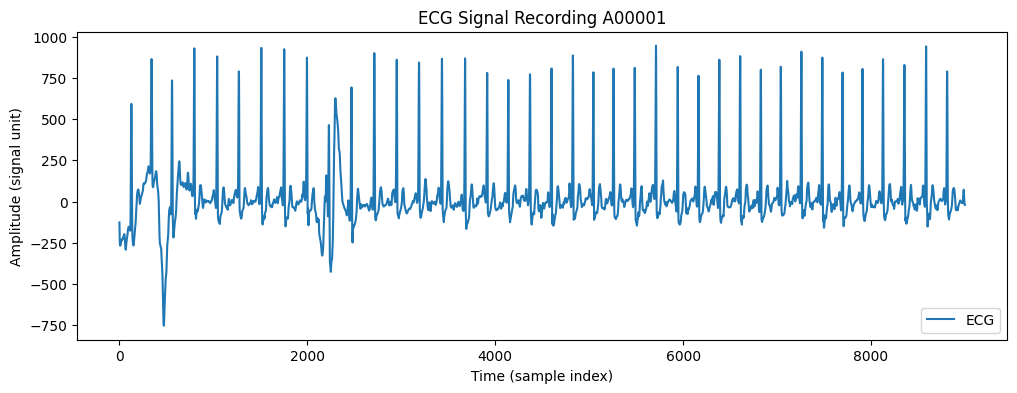

In [95]:
plt.figure(figsize=(12, 4))
plt.plot(ecg_signal, label='ECG')
plt.title("ECG Signal Recording A00001")
plt.xlabel("Time (sample index)")
plt.ylabel("Amplitude (signal unit)")
plt.legend()
plt.show()

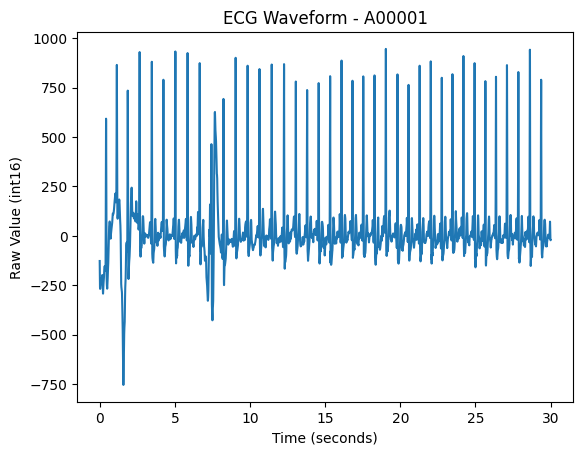

In [96]:
fs = 300
time_axis = np.arange(len(ecg_signal)) / fs

plt.plot(time_axis, ecg_signal)
plt.xlabel("Time (seconds)")
plt.ylabel("Raw Value (int16)")
plt.title("ECG Waveform - A00001")
plt.show()

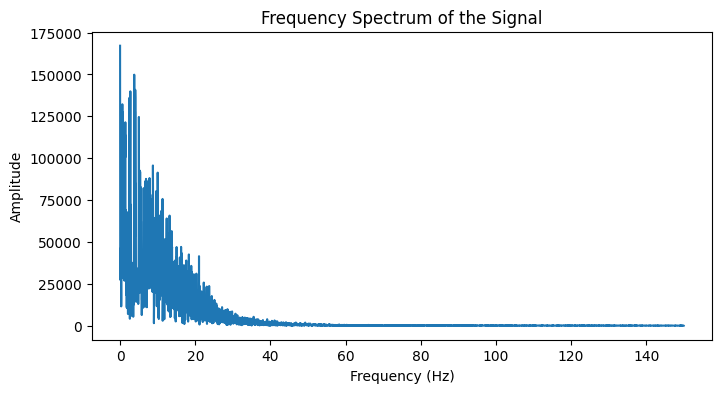

In [97]:
N = len(ecg_signal)
yf = fft(ecg_signal)
xf = fftfreq(N, 1/fs)

plt.figure(figsize=(8, 4))
plt.plot(xf[:N//2], np.abs(yf[:N//2]))
plt.title("Frequency Spectrum of the Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.show()

In [98]:
plt.show()
out = ecg.ecg(signal=ecg_signal, sampling_rate=fs, show=False)
rpeaks = out['rpeaks']

rr_intervals = np.diff(rpeaks) / fs
print("First 10 values of RR intervals (seconds):", rr_intervals[:10])

mean_hr = 60.0 / rr_intervals.mean()
print(f"Average Heart Rate: {mean_hr:.2f} bpm")

First 10 values of RR intervals (seconds): [0.71666667 0.72666667 0.79       0.81       0.77       0.79666667
 0.81333333 0.80666667 0.79666667 0.78333333]
Average Heart Rate: 78.77 bpm


In [99]:
labels_unique = df_labels['label'].unique()

n_samples_per_class = 3

selected_records = {}

for lab in labels_unique:
    subset = df_labels[df_labels['label'] == lab]
    chosen = subset.sample(n_samples_per_class, random_state=42)
    selected_records[lab] = chosen['record'].values.tolist()

selected_records


{'N': ['A01/A01428', 'A08/A08102', 'A00/A00053'],
 'A': ['A06/A06932', 'A00/A00974', 'A02/A02782'],
 'O': ['A01/A01477', 'A00/A00737', 'A06/A06008'],
 '~': ['A01/A01063', 'A03/A03946', 'A06/A06262']}

In [100]:
results = []

for lab, rec_list in selected_records.items():
    for rec_name in rec_list:
        mat_path = f"/home/bunyamin/Desktop/BE_PC/Work/2.Project/5.Heartbeat/Dev/Heartbeat/.data/raw/train/{rec_name}.mat"

        data = sio.loadmat(mat_path)
        ecg_sig = data['val'][0]

        sig_len = len(ecg_sig)
        mean_val = ecg_sig.mean()
        std_val = ecg_sig.std()

        out = ecg.ecg(signal=ecg_sig, sampling_rate=fs, show=False)
        rpeaks = out['rpeaks']
        if len(rpeaks) > 1:
            rr_int = np.diff(rpeaks)/fs
            mean_hr = 60.0/rr_int.mean()
        else:
            mean_hr = np.nan

        results.append({
            "record": rec_name,
            "label": lab,
            "length_samples": sig_len,
            "length_seconds": sig_len/fs,
            "mean_val": mean_val,
            "std_val": std_val,
            "mean_hr": mean_hr
        })

df_results = pd.DataFrame(results)
print(df_results)

        record label  length_samples  length_seconds   mean_val     std_val  \
0   A01/A01428     N            9000       30.000000  -0.272333   96.095482   
1   A08/A08102     N           18000       60.000000   1.726944   50.703694   
2   A00/A00053     N            9000       30.000000   1.667778  116.731399   
3   A06/A06932     A            9000       30.000000  -6.291889  149.691688   
4   A00/A00974     A            9000       30.000000  26.453444  153.625640   
5   A02/A02782     A            9000       30.000000  48.064889  258.669678   
6   A01/A01477     O            9000       30.000000 -29.571778  261.581027   
7   A00/A00737     O            9000       30.000000 -31.849333  257.992290   
8   A06/A06008     O           10078       33.593333  70.419329  274.865087   
9   A01/A01063     ~            7530       25.100000  30.712483  808.002677   
10  A03/A03946     ~            5066       16.886667  11.487959  345.608409   
11  A06/A06262     ~           11954       39.846667

In [101]:
df_train = pd.read_csv(df_train_labels_path,
 header=None, names=["record","label"])
df_val = pd.read_csv(df_val_labels_path,
 header=None, names=["record","label"])

train_counts = df_train['label'].value_counts()
val_counts = df_val['label'].value_counts()

print("=== Train Folder Label Numbers ===")
print(train_counts)

print("\n=== Validation Folder Label Numbers ===")
print(val_counts)

train_perc = df_train['label'].value_counts(normalize=True) * 100
val_perc = df_val['label'].value_counts(normalize=True) * 100

print("=== Train Folder Label Percentages ===")
print(train_perc)

print("\n=== Validation Folder Label Percentages ===")
print(val_perc)

=== Train Folder Label Numbers ===
label
N    5076
O    2415
A     758
~     279
Name: count, dtype: int64

=== Validation Folder Label Numbers ===
label
N    148
O     65
A     47
~     40
Name: count, dtype: int64
=== Train Folder Label Percentages ===
label
N    59.521576
O    28.318480
A     8.888368
~     3.271576
Name: proportion, dtype: float64

=== Validation Folder Label Percentages ===
label
N    49.333333
O    21.666667
A    15.666667
~    13.333333
Name: proportion, dtype: float64


In [102]:
all_labels = sorted(set(df_train['label'].unique()) | set(df_val['label'].unique()))

df_compare_count = pd.DataFrame({
    'train_count': train_counts.reindex(all_labels, fill_value=0),
    'val_count': val_counts.reindex(all_labels, fill_value=0)
})

df_compare_percent = pd.DataFrame({
    'train_%': train_perc.reindex(all_labels, fill_value=0),
    'val_%':   val_perc.reindex(all_labels, fill_value=0)
})

print("=== Label Distribution (NUMBER) ===")
print(df_compare_count)
print("\n=== Label Distribution (PERCENT) ===")
print(df_compare_percent)


=== Label Distribution (NUMBER) ===
       train_count  val_count
label                        
A              758         47
N             5076        148
O             2415         65
~              279         40

=== Label Distribution (PERCENT) ===
         train_%      val_%
label                      
A       8.888368  15.666667
N      59.521576  49.333333
O      28.318480  21.666667
~       3.271576  13.333333


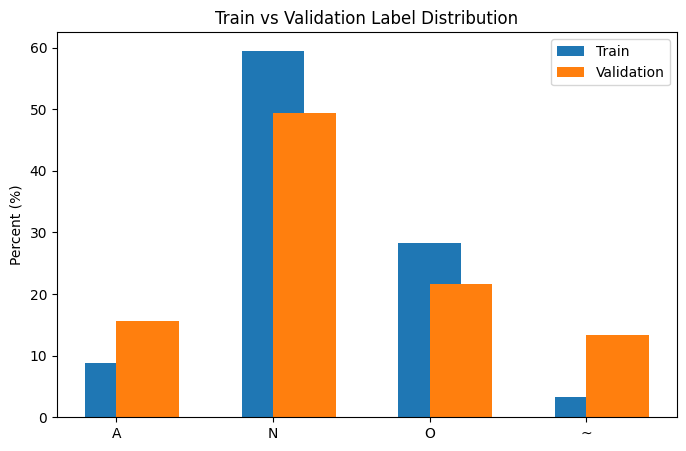

In [103]:
labels = df_compare_percent.index
x = range(len(labels))

plt.figure(figsize=(8, 5))
plt.bar(x, df_compare_percent['train_%'], width=0.4, label='Train')
plt.bar(x, df_compare_percent['val_%'], width=0.4, label='Validation', align='edge')
plt.xticks(x, labels)
plt.ylabel("Percent (%)")
plt.title("Train vs Validation Label Distribution")
plt.legend()
plt.show()

In [104]:
fs = 300
MIN_DURATION_SEC = 5
CHUNK_SIZE_SEC = 1
CHUNK_SIZE = fs * CHUNK_SIZE_SEC

df_labels = pd.read_csv(df_train_labels_path, header=None, names=["record", "label"])
print(f"Train label CSV total records: {len(df_labels)}")

records_missing_mat = []
records_zero_length = []
records_const_signal = []
records_very_short = []
records_partial_missing = []
records_missing_label = []

for idx, row in df_labels.iterrows():
    record_id = row["record"]
    label_val = row["label"]

    if pd.isna(label_val) or label_val == "":
        records_missing_label.append(record_id)

    parts = record_id.split("/")
    if len(parts) == 2:
        subfolder, basefile = parts
        mat_path = os.path.join(train_dir, subfolder, f"{basefile}.mat")
    else:
        mat_path = os.path.join(train_dir, f"{record_id}.mat")

    if not os.path.exists(mat_path):
        records_missing_mat.append(record_id)
        continue

    try:
        mat_data = sio.loadmat(mat_path)
    except Exception as e:
        print(f"Hata ({record_id}): {e}")
        records_missing_mat.append(record_id)
        continue

    if 'val' not in mat_data:
        records_missing_mat.append(record_id)
        continue

    ecg_signal = mat_data['val']
    if ecg_signal.ndim == 2:
        ecg_signal = ecg_signal[0]

    signal_length = len(ecg_signal)

    if signal_length == 0:
        records_zero_length.append(record_id)
        continue

    duration_sec = signal_length / fs
    if duration_sec < MIN_DURATION_SEC:
        records_very_short.append(record_id)

    val_range = ecg_signal.max() - ecg_signal.min()
    if val_range == 0:
        records_const_signal.append(record_id)
    else:
        threshold_std = 1e-4
        partial_missing_found = False
        for start_idx in range(0, signal_length - CHUNK_SIZE + 1):
            chunk = ecg_signal[start_idx : start_idx + CHUNK_SIZE]
            if chunk.std() < threshold_std:
                partial_missing_found = True
                break
        if partial_missing_found:
            records_partial_missing.append(record_id)

print("\n=== Report ===")

print(f"Record without .mat file: {len(records_missing_mat)}")
if records_missing_mat:
    print(records_missing_mat)

print(f"Zero length signal: {len(records_zero_length)}")
if records_zero_length:
    print(records_zero_length)

print(f"Very short (<{MIN_DURATION_SEC} sec) record: {len(records_very_short)}")
if records_very_short:
    print(records_very_short)

print(f"Completely constant signal: {len(records_const_signal)}")
if records_const_signal:
    print(records_const_signal)

print(f"Partially missing (fixed block) signal: {len(records_partial_missing)}")
if records_partial_missing:
    print(records_partial_missing)

print(f"Label (NaN/Na): {len(records_missing_label)}")
if records_missing_label:
    print(records_missing_label)


Train label CSV total records: 8528

=== Report ===
Record without .mat file: 0
Zero length signal: 0
Very short (<5 sec) record: 0
Completely constant signal: 0
Partially missing (fixed block) signal: 0
Label (NaN/Na): 0


In [105]:
shape_counts = defaultdict(int)
length_counts = defaultdict(int)

records_info = []

for root, dirs, files in os.walk(train_dir):
    for fname in files:
        if fname.endswith(".mat"):
            full_path = os.path.join(root, fname)

            try:
                mat_data = sio.loadmat(full_path)
            except Exception as e:
                print(f"File could not be read: {full_path} - Error: {e}")
                continue

            if 'val' not in mat_data:
                print(f"Warning: no 'val' key in '{fname}'!")
                continue

            ecg_signal = mat_data['val']

            shape = ecg_signal.shape

            shape_counts[shape] += 1

            if ecg_signal.ndim == 2 and (ecg_signal.shape[0] == 1 or ecg_signal.shape[1] == 1):
                ecg_signal = ecg_signal.reshape(-1)

            signal_length = len(ecg_signal)

            length_counts[signal_length] += 1

            records_info.append((fname, shape, signal_length))


print("=== Shape Distribution ===")
for shp, count in shape_counts.items():
    print(f"{shp}: {count} dosya")

print("\n=== Length Distribution ===")
sorted_length_counts = sorted(length_counts.items())
for length_val, count in sorted_length_counts:
    print(f"{length_val} Sample: {count} File")

# for rec in records_info:
#    print(rec)


=== Shape Distribution ===
(1, 18000): 809 dosya
(1, 9000): 5977 dosya
(1, 6894): 1 dosya
(1, 3220): 1 dosya
(1, 9444): 1 dosya
(1, 11660): 1 dosya
(1, 3202): 1 dosya
(1, 5078): 2 dosya
(1, 3448): 1 dosya
(1, 5392): 1 dosya
(1, 6550): 1 dosya
(1, 3886): 1 dosya
(1, 9294): 1 dosya
(1, 4610): 1 dosya
(1, 8670): 1 dosya
(1, 12588): 1 dosya
(1, 8400): 1 dosya
(1, 15242): 1 dosya
(1, 11388): 1 dosya
(1, 4186): 1 dosya
(1, 17926): 1 dosya
(1, 5608): 1 dosya
(1, 5918): 1 dosya
(1, 5692): 1 dosya
(1, 8006): 1 dosya
(1, 4004): 1 dosya
(1, 7856): 1 dosya
(1, 5034): 1 dosya
(1, 4124): 2 dosya
(1, 3346): 1 dosya
(1, 4316): 1 dosya
(1, 3334): 2 dosya
(1, 4864): 1 dosya
(1, 15292): 1 dosya
(1, 3462): 1 dosya
(1, 14928): 2 dosya
(1, 3260): 2 dosya
(1, 8294): 1 dosya
(1, 14768): 1 dosya
(1, 7298): 1 dosya
(1, 7128): 1 dosya
(1, 3514): 1 dosya
(1, 3100): 2 dosya
(1, 4942): 2 dosya
(1, 6594): 2 dosya
(1, 7458): 2 dosya
(1, 5674): 1 dosya
(1, 10444): 1 dosya
(1, 8138): 1 dosya
(1, 10998): 2 dosya
(1, 156